In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import glob
from review import Review
from preprocess import Preprocess
import pandas as pd
import seaborn as sn
%matplotlib inline

# 导入csv格式的数据并查看

In [2]:
path = 'C:/Users/cyuuu/Desktop/xuxu/steam_reviews/data/minidata.csv'
data = Review(path)
data.raw.head()

,0,index,helpfulness,review_title,total_hours,diff_date,text_content,user_name,game_count,comment_count,xp,review_count,friend_count
0,0,0,81,推荐,0.7,34,20190617更新所谓官方，居然恬不知耻的跑到这里来威胁评测者，不仅不懂法律而且恶意威胁，...,月光疾风,92,4,0,0,0
1,1,1,19,不推荐,11.2,1098,客服的态度仿佛我杀了他妈,さに様,78,0,50,8,10
2,2,2,13,不推荐,41.4,1226,论坛上那是什么狗币客服 天天怼玩家 有你吗这时间还不如多修修你的BUGsteam上面的...,patriceent,2,0,0,1,5
3,3,3,22,推荐,29.4,52,这是一篇带有主观看法的评测。 这是一款出色的海战游戏，也是本世代海战游戏的先驱者和奠基人。 ...,Rhonin_Seiei@上次在线：10天以前,289,1,500,6,46
4,4,4,14,推荐,20.6,26,虽然在出潜艇后我弃坑了，但是不得不说，这是永远永远永远的经典。。。我的童年就是这游戏陪伴我度过的。,方方小次郎,107,0,100,11,32


# 数据预处理

In [3]:
stop_words_path = "../dict/baidu_stopwords.txt" # 停用词的地址
userdict = "../dict/userdict.txt" # 自定义词的地址
# filter_p = re.compile(r'[^\u4e00-\u9fa50-9A-Za-z]') # 去除特殊字符
pattern = r'[^\u4e00-\u9fa5A-Za-z]' # 删除所有标点符号，数字和特殊字符
pre = Preprocess(data.raw["text_content"], stop_words_path, pattern, userdict)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cyuuu\AppData\Local\Temp\jieba.cache
Loading model cost 0.591 seconds.
Prefix dict has been built successfully.


In [4]:
pre.token

['更新 官方 居然 恬不知耻 不知 知耻 跑 里来 威胁 评测 不 懂法 法律 恶意 威胁 强盗 式 逻辑 都 情况 上交 交给 steam 官方 建议 贵方 留 下地 地址 邮箱 我会 会考 贵方 发送 律师 律师函 起诉 恐吓 威胁 法院 见 分割 分割线 割线 更新 哈哈哈 哈哈哈哈 哈哈哈 官方 来回 回复 官方 嘴脸 不 说 平台 所有人 有人 diss 极品 提 人 不 不想 想去 本人 人大 大部 大部分 分时 时间 美 服玩 九 玩家 交集 并不多 不多 请 酷派天空 天空 嘴脸 请问 运营 放心 顺带 提 再 回 坑 Navyfield 青春 回忆 人 毁 修改 改回 回答 北美 NavyfieldMOD 管理 管理员 身份 正式 声明 明为 财产 损失 不 建议 玩家 入 坑 酷 派 大海 大海战 海战 战舰 舰队 使命 分割 分割线 割线 更新 介于 美 服 国内 服 经合 合并 并以 运营 运营商 营商 劣迹 斑斑 事迹 不再 推荐 详情 建议 去 大海 大海战 海战 情况 想 玩 海战 WOWS WT 都 选择 至少 两家 正规 游戏 运营 运营商 营商 NavyField 这款 游戏 只能 能留 留在 玩家 记忆 中 分割 分割线 割线 国 服 年 入 坑 美 服 年 入 坑 做 两年 美 服 MODGM 贴 名 仙剑 月光 疾风 只 想 看 游戏 优缺点 缺点 入 不入 坑 跳转 想 看 一个 老 玩家 碎 碎 念 无视 碎 碎 念 笔者 初中 中时 入 坑 一张 月 卡 还 没玩 玩完 拉进 万恶 军训 高考 监狱 大学 学时 回 坑 年 年初 赶在 和服 后进 进驻 Nebraska 服务 服务器 务器 见证 最早 华夏 Iron 联盟 兴盛 经历 历年 GM 疯狂 ban 号 玩 多年 号 ban 解封 当过 两年 mod 理过 Chinglish 中文 ticket 帮 国人 港 打过 国人 港 见 国人 联合 港 比赛 国人 贴 QQ 撕 逼 国人 联合 港 比赛 国人 贴 QQ 撕 逼 国人 联合 港 国人 贴 QQ 撕 逼 循环 加过 乱七八糟 七八 糟得 美国 国人 菲律宾 菲律宾人 波兰 波兰人 日本 本人 舰队 NavyField 官方 水晶 纪念 杯 结交 很多 多国 国内 国内外 内外 朋友 交换 换过 sky

# word2vec

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features =1000, max_df = 0.5, smooth_idf = True)
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=1000, ngram_range=(1, 1))

In [6]:
X = vectorizer.fit_transform(pre.token)
X.shape

(106, 1000)

# LSA主题建模

In [7]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

2

In [8]:
terms = vectorizer.get_feature_names()

In [9]:
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=' ')
    print()

Topic 0: 
游戏 海战 经典 老 玩 玩家 不 
Topic 1: 
经典 延续 产品 获取 免费 永远 太 


# 可视化

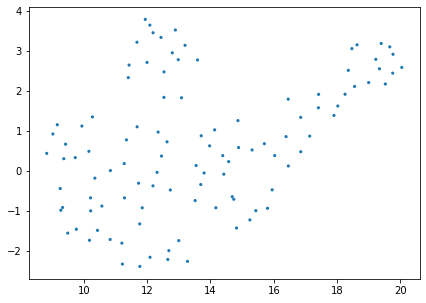

In [10]:
import umap.umap_ as umap 
X_topics = svd_model.fit_transform(X)

embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))

plt.scatter(embedding[:, 0], embedding[:, 1], s = 10, edgecolor='none')

plt.show()